In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from matplotlib.text import Text
from math import sin, cos, sqrt, atan2, radians,asin
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from matplotlib.legend_handler import HandlerBase
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster
from geopy.distance import great_circle
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
import folium
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
from geopy.distance import geodesic

In [46]:
train=pd.read_csv("./BlackFriday.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Check for missing values

### Replace NaN with 0

In [47]:
train = train.fillna(0)

# Linear Regression

### 'Purchase' is the variable that we need to predict, so let's do some analysis on it. let's take a look at the distribution of it

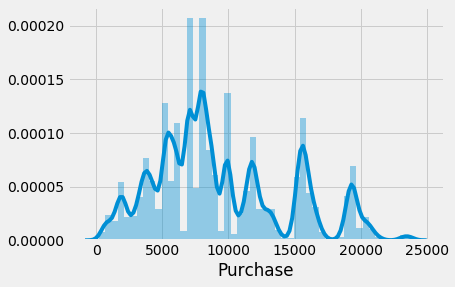

In [48]:
sns.distplot(train['Purchase'])

In [49]:
print("Range of Purchase is ", (min(train['Purchase']),max(train['Purchase'])))

Range of Purchase is  (185, 23961)


### Dropping the user_id and product_id columns for the One-Hot encoding procedure

In [50]:
user_id = train['User_ID']
product_id = train['Product_ID']
target = train['Purchase']
train = train.drop(columns = ['User_ID', 'Product_ID'])

In [51]:
train = pd.get_dummies(train)
train.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0.0,0.0,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,0.0,0.0,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,0.0,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,0.0,0.0,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [52]:
occ = pd.get_dummies(train['Occupation'])
occ.columns = ['occupation_type#' + str(col) for col in occ.columns]
occ.head()

,occupation_type#0,occupation_type#1,occupation_type#2,occupation_type#3,occupation_type#4,occupation_type#5,occupation_type#6,occupation_type#7,occupation_type#8,occupation_type#9,...,occupation_type#11,occupation_type#12,occupation_type#13,occupation_type#14,occupation_type#15,occupation_type#16,occupation_type#17,occupation_type#18,occupation_type#19,occupation_type#20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
train = pd.concat([train, occ], axis = 1)
train = train.drop(columns = ['Occupation'])
train.head()

,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,occupation_type#11,occupation_type#12,occupation_type#13,occupation_type#14,occupation_type#15,occupation_type#16,occupation_type#17,occupation_type#18,occupation_type#19,occupation_type#20
0,0,3,0.0,0.0,8370,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,6.0,14.0,15200,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,12,0.0,0.0,1422,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,12,14.0,0.0,1057,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,8,0.0,0.0,7969,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
data = train[['Purchase', 'Product_Category_1', 'Gender_F','Gender_M', 'City_Category_A',
                'Product_Category_3', 'City_Category_C', 
                'Product_Category_2']]
data_corr = data.corr()
data_corr

,Purchase,Product_Category_1,Gender_F,Gender_M,City_Category_A,Product_Category_3,City_Category_C,Product_Category_2
Purchase,1.000000,-0.314125,-0.060086,0.060086,-0.045780,0.284120,0.068647,0.038395
Product_Category_1,-0.314125,1.000000,0.045661,-0.045661,0.022887,-0.389048,-0.023137,-0.040730
Gender_F,-0.060086,0.045661,1.000000,-1.000000,-0.007416,-0.035813,-0.000329,0.001580
Gender_M,0.060086,-0.045661,-1.000000,1.000000,0.007416,0.035813,0.000329,-0.001580
City_Category_A,-0.045780,0.022887,-0.007416,0.007416,1.000000,-0.028082,-0.406305,-0.012915
Product_Category_3,0.284120,-0.389048,-0.035813,0.035813,-0.028082,1.000000,0.035090,0.090284
City_Category_C,0.068647,-0.023137,-0.000329,0.000329,-0.406305,0.035090,1.000000,0.019709
Product_Category_2,0.038395,-0.040730,0.001580,-0.001580,-0.012915,0.090284,0.019709,1.000000


In [63]:
test = train.sample(frac = 0.2, random_state = 42)
X = train.drop(columns = {'Purchase'})
y = train['Purchase']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [65]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Top 10 Products sold

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Plot Heatmap of above average scores

**Heatmap based on amount across dataset**

In [61]:
y_pred = regressor.predict(X_test)

### plotting the top 1- products sold

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

### plotting the product category

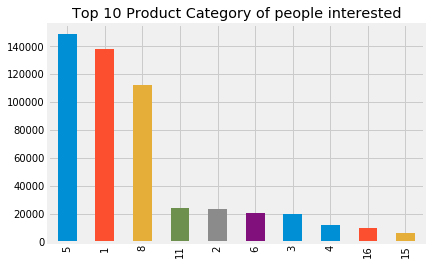

In [18]:
simple_bar_plot(train["Product_Category_1"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Category of people interested")

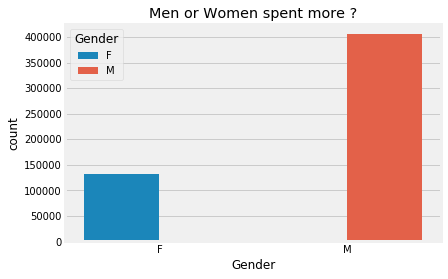

In [19]:
count_plot(train,"Gender","Men or Women spent more ?","Gender")

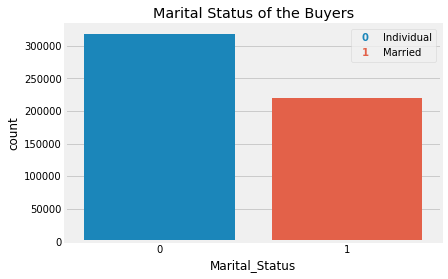

In [20]:
ax=sns.countplot(train.Marital_Status) 
#creating the mapping text for the values
handltext = ["0", "1"]
labels = ["Individual", "Married"]
#get the X axis tick labels
t = ax.get_xticklabels()
#map the x values as key and values
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
plt.title("Marital Status of the Buyers")
plt.show()

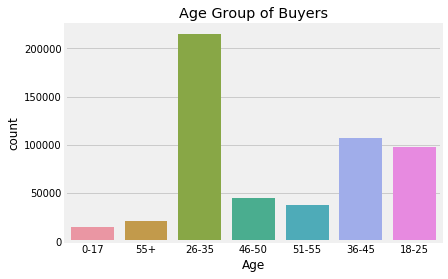

In [21]:
count_plot(train,"Age","Age Group of Buyers")

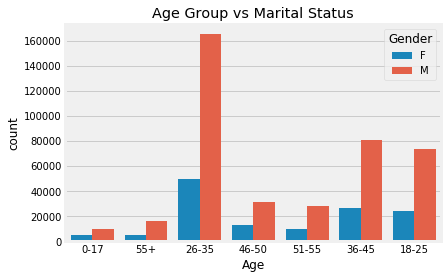

In [22]:
count_plot(train,"Age","Age Group vs Marital Status", "Gender")

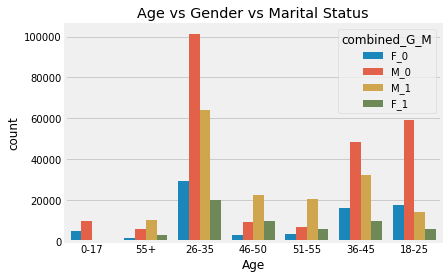

In [23]:
train['combined_G_M'] = train.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
#The above line results in the classes F_0 (unmarried females) M_0 (Unmarried males) 
#and F_1 M_1 (married females and males)
count_plot(train,"Age","Age vs Gender vs Marital Status", "combined_G_M")